# Exploring California's Congressional Districts

I explore a data set of nationwide congressional districts from the 114th Congress, but subset California's districts before visualizing it with a folium map.

Importing necessary libraries

In [18]:
import pandas as pd
import geopandas as gpd
import folium

Importing the data

In [19]:
cd = gpd.read_file("districts114.zip")

Returns the number of rows and columns

In [20]:
cd.shape

(436, 16)

Includes information about the index dtype, values, and length

In [30]:
cd.info
cd.DISTRICT.info

<bound method Series.info of 0       6
1       1
2       2
3       1
4       2
       ..
431     8
432     0
433     0
434    15
435    16
Name: DISTRICT, Length: 436, dtype: object>

Plots the shapefile given the geometry column

<Axes: >

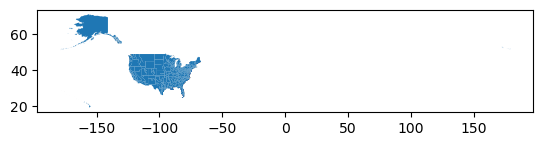

In [22]:
cd.plot()

In [23]:
cd.DISTRICT.value_counts()

DISTRICT
1     43
2     43
3     38
4     35
5     29
6     26
7     24
8     21
9     17
10    13
11    12
12    11
13    10
14     9
0      7
15     7
16     7
17     6
18     6
23     4
26     4
25     4
24     4
27     4
22     4
20     4
19     4
21     4
32     2
36     2
35     2
33     2
34     2
31     2
30     2
29     2
28     2
46     1
53     1
52     1
51     1
50     1
49     1
48     1
47     1
39     1
45     1
44     1
43     1
42     1
41     1
40     1
38     1
37     1
98     1
Name: count, dtype: int64

In [24]:
cd.head()

,STATENAME,ID,DISTRICT,STARTCONG,ENDCONG,DISTRICTSI,COUNTY,PAGE,LAW,NOTE,BESTDEC,FINALNOTE,RNOTE,LASTCHANGE,FROMCOUNTY,geometry
0,Louisiana,022113114006,6,113,114,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"MULTIPOLYGON (((-91.82288 30.85806, -91.82264 ..."
1,Maine,023113114001,1,113,114,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"MULTIPOLYGON (((-70.98905 43.79215, -70.98849 ..."
2,Maine,023113114002,2,113,114,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"MULTIPOLYGON (((-71.08216 45.30631, -71.08169 ..."
3,Maryland,024113114001,1,113,114,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"MULTIPOLYGON (((-77.31156 39.63875, -77.31154 ..."
4,Maryland,024113114002,2,113,114,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"MULTIPOLYGON (((-76.87630 39.14132, -76.87622 ..."


Filters just the observations where STATENAME is equal to California, plots again

<Axes: >

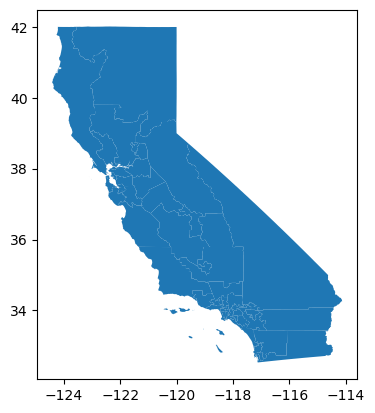

In [25]:
cd_trim = cd.query("STATENAME == 'California'")
cd_trim.plot()

Extracts latitude and longitude from the geometry column to calculate the mean of each

In [26]:
cd_trim = cd_trim.to_crs(4326)
cd_trim['long'] = cd_trim.centroid.x
cd_trim['lat'] = cd_trim.centroid.y
avg_long = cd_trim.long.mean()
avg_lat = cd_trim.lat.mean()
cd_trim.head()

/tmp/ipykernel_138/2542827719.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cd_trim['long'] = cd_trim.centroid.x
/tmp/ipykernel_138/2542827719.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cd_trim['lat'] = cd_trim.centroid.y


,STATENAME,ID,DISTRICT,STARTCONG,ENDCONG,DISTRICTSI,COUNTY,PAGE,LAW,NOTE,BESTDEC,FINALNOTE,RNOTE,LASTCHANGE,FROMCOUNTY,geometry,long,lat
168,California,006113114001,1,113,114,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"POLYGON ((-123.71917 41.59561, -123.71900 41.5...",-121.508574,40.746591
169,California,006113114002,2,113,114,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"MULTIPOLYGON (((-124.20994 41.99843, -124.2096...",-123.434238,40.143552
170,California,006113114003,3,113,114,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"MULTIPOLYGON (((-123.09422 39.08895, -123.0942...",-122.094945,39.036786
171,California,006113114004,4,113,114,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"POLYGON ((-121.48444 38.75005, -121.48444 38.7...",-119.936750,37.987691
172,California,006113114005,5,113,114,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"MULTIPOLYGON (((-123.05632 39.02336, -123.0562...",-122.468060,38.535208


Creates a folium map with the mean latitude and longitude to center, and a for loop to create markers in the coordinates of every district

In [27]:
map = folium.Map(location=[avg_lat, avg_long])
for index, row in cd_trim.iterrows():
    tooltip_text = row.DISTRICT + 'st District, ' + row.STATENAME
    folium.Marker(
        [row.lat,row.long], 
        popup=row.DISTRICT, 
        tooltip=tooltip_text,
    ).add_to(map)
map